In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np

excel1 = pd.read_excel("../datos/centro_movil.xlsx", engine='openpyxl')
excel2 = pd.read_excel("../datos/centro_movil1.xlsx", engine='openpyxl')
excel3 = pd.read_excel("../datos/centro_movil2.xlsx", engine='openpyxl')

df = pd.concat([excel1, excel2, excel3], ignore_index=True)

item_codes = df['ItemCode'].unique()

df_merge = pd.DataFrame()

def calculate_metrics(df, item_code):
    df_item = df.loc[df['ItemCode'] == item_code].copy()
    df_item['FECHA'] = pd.to_datetime(df_item['FECHA'])
    df_item.set_index('FECHA', inplace=True)
    df_resampled = df_item.resample('W').sum()
    df_filtered = df_resampled[df_resampled['Quantity'] != 0]

    # Calcular ADI
    total_periods = len(df_resampled)
    periods_with_demand = len(df_filtered)
    ADI = total_periods / periods_with_demand

    # Calcular CV²
    media = np.mean(df_filtered['Quantity'])
    sdt = np.std(df_filtered['Quantity'])
    cv = (sdt / media) ** 2
        
    if ADI <= 1.32 and cv <= 0.49:
        df_resampled['category'] = 'suavizadas'
    elif ADI <= 1.32 and cv > 0.49:
        df_resampled['category'] = 'erraticas'
    elif ADI > 1.32 and cv > 0.49:
        df_resampled['category'] = 'irregulares'
    elif ADI > 1.32 and cv <= 0.49:
        df_resampled['category'] = 'intermitentes'

    df_resampled['ItemCode'] = item_code
    
    return cv, ADI, df_resampled

metrics = {item_code: calculate_metrics(df, item_code) for item_code in item_codes}

df_merge = pd.concat([df_resampled for _, _, df_resampled in metrics.values()], ignore_index=False)

for item_code, (cv, ADI, _) in metrics.items():
    print(f"ItemCode: {item_code}, CV: {cv}, ADI: {ADI}")


print(df_merge['category'].unique())
df_merge



ItemCode: MB-DIS-163S8M27, CV: 0.9806439554631562, ADI: 1.0849673202614378
ItemCode: NGK-BKR5EKB-11, CV: 3.793307706025483, ADI: 1.305084745762712
ItemCode: NGK-BKR6EKB-11, CV: 4.159091586437796, ADI: 1.32
['erraticas']


,ItemCode,Quantity,MONTO USD,category
FECHA,,,,
2018-08-05,MB-DIS-163S8M27,1,134.712644,erraticas
2018-08-12,MB-DIS-163S8M27,148,2151.382184,erraticas
2018-08-19,MB-DIS-163S8M27,106,1399.962184,erraticas
2018-08-26,MB-DIS-163S8M27,223,3177.799195,erraticas
2018-09-02,MB-DIS-163S8M27,208,2629.069080,erraticas
...,...,...,...,...
2021-09-05,NGK-BKR6EKB-11,0,0.000000,erraticas
2021-09-12,NGK-BKR6EKB-11,0,0.000000,erraticas
2021-09-19,NGK-BKR6EKB-11,550,1006.500000,erraticas


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np

excel1 = pd.read_excel("../datos/centro_movil.xlsx", engine='openpyxl')
excel2 = pd.read_excel("../datos/centro_movil1.xlsx", engine='openpyxl')
excel3 = pd.read_excel("../datos/centro_movil2.xlsx", engine='openpyxl')
excel4 = pd.read_excel("../datos/SUPRENS dataset.xlsx", engine='openpyxl')
excel5 = pd.read_excel("../datos/TOYO dataset.xlsx", engine='openpyxl')
df = pd.concat([excel1, excel2, excel3,excel4, excel5], ignore_index=True)
def calculate_metrics(df, item_code):
    df_item = df.loc[df['ItemCode'] == item_code].copy()
    df_item['FECHA'] = pd.to_datetime(df_item['FECHA'])
    df_item.set_index('FECHA', inplace=True)
    df_resampled = df_item.resample('W').sum()
    df_filtered = df_resampled[df_resampled['Quantity'] != 0]

    # Calcular ADI
    total_periods = len(df_resampled)
    periods_with_demand = len(df_filtered)
    ADI = total_periods / periods_with_demand

    # Calcular CV²
    media = np.mean(df_filtered['Quantity'])
    sdt = np.std(df_filtered['Quantity'])
    cv = (sdt / media) ** 2
        
    if ADI <= 1.32 and cv <= 0.49:
        df_resampled['category'] = 'suavizadas'
    elif ADI <= 1.32 and cv > 0.49:
        df_resampled['category'] = 'erraticas'
    elif ADI > 1.32 and cv > 0.49:
        df_resampled['category'] = 'irregulares'
    elif ADI > 1.32 and cv <= 0.49:
        df_resampled['category'] = 'intermitentes'

    df_resampled['ItemCode'] = item_code
    
    return cv, ADI, df_resampled

metrics = {item_code: calculate_metrics(df, item_code) for item_code in item_codes}

df_merge = pd.concat([df_resampled for _, _, df_resampled in metrics.values()], ignore_index=False)

for item_code, (cv, ADI, _) in metrics.items():
    print(f"ItemCode: {item_code}, CV: {cv}, ADI: {ADI}")


print(df_merge['category'].unique())
df_merge


ItemCode: MB-DIS-163S8M27, CV: 0.9806439554631562, ADI: 1.0849673202614378
ItemCode: NGK-BKR5EKB-11, CV: 3.793307706025483, ADI: 1.305084745762712
ItemCode: NGK-BKR6EKB-11, CV: 4.159091586437796, ADI: 1.32
['erraticas']


,ItemCode,Quantity,MONTO USD,GRUPO,VENTAS USD,category
FECHA,,,,,,
2018-08-05,MB-DIS-163S8M27,1.0,134.712644,0,0.0,erraticas
2018-08-12,MB-DIS-163S8M27,148.0,2151.382184,0,0.0,erraticas
2018-08-19,MB-DIS-163S8M27,106.0,1399.962184,0,0.0,erraticas
2018-08-26,MB-DIS-163S8M27,223.0,3177.799195,0,0.0,erraticas
2018-09-02,MB-DIS-163S8M27,208.0,2629.069080,0,0.0,erraticas
...,...,...,...,...,...,...
2021-09-05,NGK-BKR6EKB-11,0.0,0.000000,0,0.0,erraticas
2021-09-12,NGK-BKR6EKB-11,0.0,0.000000,0,0.0,erraticas
2021-09-19,NGK-BKR6EKB-11,550.0,1006.500000,0,0.0,erraticas


In [65]:
df.columns

Index(['ItemCode', 'FECHA', 'Quantity', 'MONTO USD', 'GRUPO', 'VENTAS USD'], dtype='object')

In [66]:
np.mean(excel5['Quantity'])

13.854545454545455

In [67]:
np.std(excel5['Quantity'])

18.266302094507047

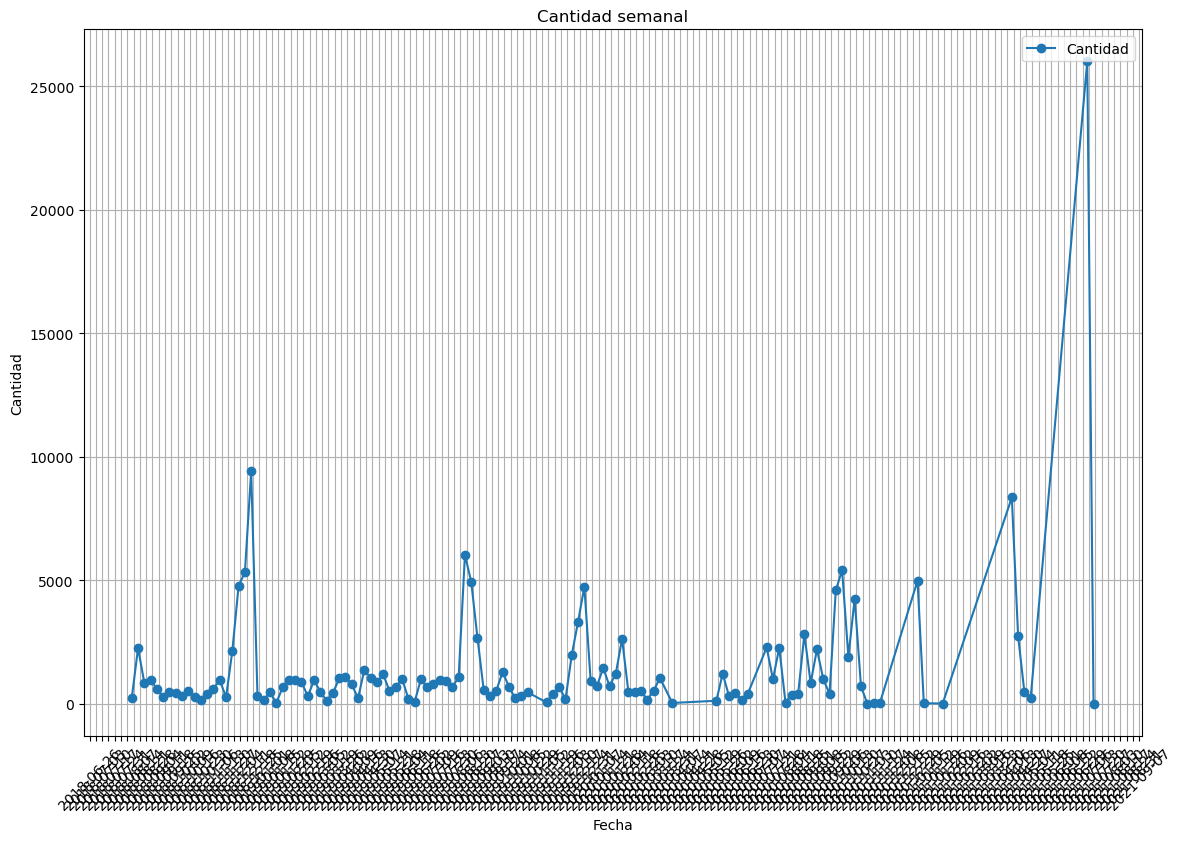

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Asegúrate de que el DataFrame 'excel5' ya esté definido y contenga las columnas 'FECHA' y 'Quantity'

# Convertir la columna 'FECHA' a tipo datetime
excel2['FECHA'] = pd.to_datetime(excel2['FECHA'])

# Establecer la columna 'FECHA' como índice
excel2.set_index('FECHA', inplace=True)

# Resamplear los datos por semana y calcular la suma de 'Quantity' para cada semana
df_resampled = excel2.resample('W').sum()

# Filtrar las semanas con cantidad diferente de cero
df_resampled = df_resampled[df_resampled['Quantity'] != 0]

# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.plot(df_resampled.index, df_resampled['Quantity'], label='Cantidad', marker='o')

# Formato del eje x para fechas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Cantidad semanal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
